In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## `1` Figure, Axes, Subplot

At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. 
The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's **`subplot()`**  function. If you have any questions about how that or the **[`figure()`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html)** function worked, then read on. 
This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more **[`Axes`](https://matplotlib.org/api/axes_api.html)**  objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

Since we don't have a Figure area to plot inside, 

**Python first creates a Figure object.** And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

<img src = 'https://video.udacity-data.com/topher/2018/August/5b804b9b_l3-c09b-subplotsa/l3-c09b-subplotsa.png'>

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is **to explicitly set up** **the Figure and Axes** like this:

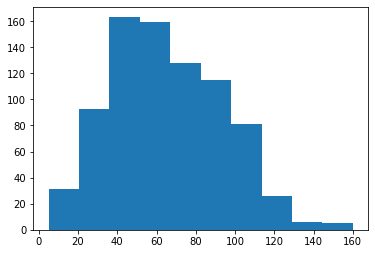

In [10]:
fig = plt.figure()
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.hist(data = df, x = 'speed');

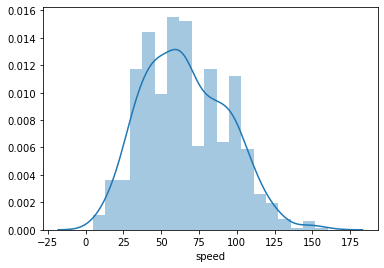

In [12]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
base_color = sns.color_palette()[0]
sns.distplot(df['speed'], color = base_color, ax = ax);

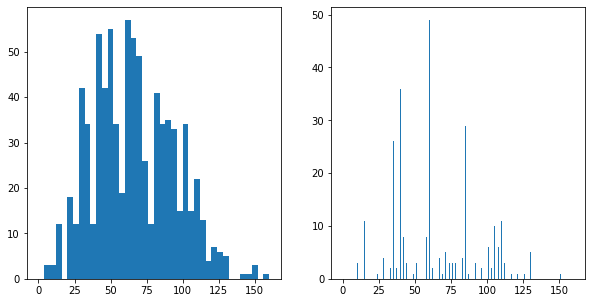

In [16]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data = df, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['speed'].max()+1/4, 1/4)
plt.hist(data = df, x = 'speed', bins = bin_edges);

### And what happen's if I remove plt.subplot(1, 2, 2) from the above?

Hint! plt.subplot() draws figure and axis on a location assigned by parameters within ( )

As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through subplot(). (

#### Reference: plt.sca(), plt.text())

<img src = 'https://video.udacity-data.com/topher/2018/August/5b8084be_l3-c09b-subplots4/l3-c09b-subplots4.png'>

---

## `2` Descriptive Statistics, Outliers and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. 

Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

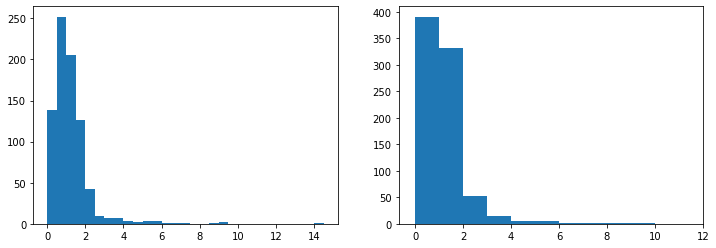

In [24]:
plt.figure(figsize = [12, 4])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['height'].max()+0.5, 0.5)
plt.hist(data = df, x = 'height', bins = bin_edges);

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 12+1, 1)
plt.hist(data = df, x = 'height', bins = bin_edges);
plt.xlim(-0.7, 12); # could also be called as plt.xlim((-0.7, 12))

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 35 to those that take values greater than 35. 

For anything that is concentrated on the bulk of the data in the former group (< 12), **use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 12).**

---

## `3` Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. 

The most common example of this is data that follows an approximately **`log-normal distribution.`** This is data that, in their natural units, **can look highly skewed**: lots of points with low values, with a very long tail of data points with large values. 

However, after **applying a logarithmic transform to** the data, the data will follow a **normal distribution.** (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)

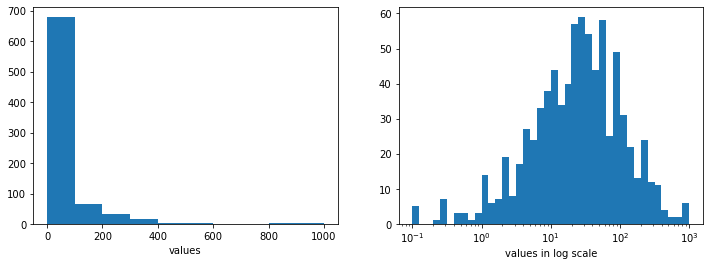

In [41]:
plt.figure(figsize = [12, 4])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['weight'].max() + 100, 100)
plt.hist(df['weight'], bins = bin_edges)
plt.xlabel('values');

plt.subplot(1, 2, 2)
log_data = np.log10(df['weight'])
log_bin_edges = 10 ** np.arange(-1, log_data.max() + 0.1, 0.1)
plt.hist(df['weight'], bins=log_bin_edges)
plt.xscale('log')
plt.xlabel('values in log scale');

In the plot on the left, the few data points with value above 400 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2. 

**The big problem** with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the 'log' scale here.

#### Notice two things about the plot now. 

Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

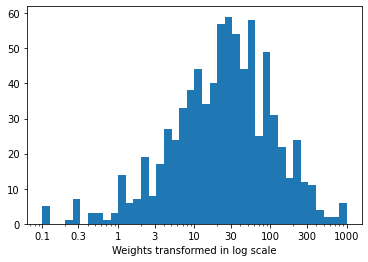

In [45]:
log_data = np.log10(df['weight'])
log_bin_edges = 10 ** np.arange(-1, log_data.max()+0.1, 0.1)

plt.hist(df['weight'], bins=log_bin_edges)
plt.xscale('log')
plt.xlabel('Weights transformed in log scale');

log_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(log_ticks, log_ticks);